# Statistical Power Assignment

In [22]:
import numpy as np
import pandas as pd
import math
from scipy import stats
from statsmodels.stats.power import TTestIndPower

import matplotlib.pyplot as plt

%matplotlib inline

### Computing Sample Size Required

Suppose we are conducting a test where we have:

- Effect size of 0.5
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of a sample size would we need for this experiment?

In [2]:
analysis = TTestIndPower()

effect = 0.5
alpha = 0.05
power = 0.8
result = analysis.solve_power(effect_size=effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
group_a = math.ceil(result)
group_a

64

In [3]:
total_n = group_a*2
total_n

print('The size of each group would be {} because the ratio is 1.0. So, the total sample size would be {}'.format(group_a, total_n))

The size of each group would be 64 because the ratio is 1.0. So, the total sample size would be 128


### Computing Effect Size Required

Suppose we are conducting a test where we have:

- Sample size of 100
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of an effect size would we need to see for this experiment?

In [4]:
n = 100
alpha = 0.05
power = 0.8
result = analysis.solve_power(effect_size=None, power=power, nobs1=n, ratio=1.0, alpha=alpha)
print('The effect size needed for this experiment would be {}'.format(result))

The effect size needed for this experiment would be 0.39813911739112756


Generate a power plot that shows how the statistical power of this test would change based on the number of observations and varying effect sizes.

In [5]:
effect_sizes = np.array([0.2,0.4,0.6,0.8])
sample_sizes = np.array(range(5,500))

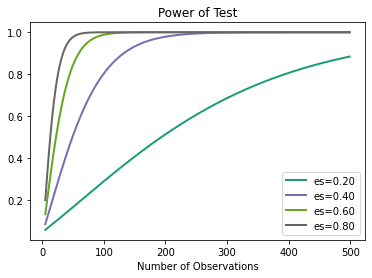

In [6]:
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

### Computing Statistical Power

Suppose we are conducting a test where we have:

- Effect size of 0.4
- Sample size of 100
- Significance level of 0.05

What would be the statistical power for this experiment?

In [7]:
effect = 0.4
n = 100
alpha = 0.05

result = analysis.solve_power(effect_size=effect, power=None, nobs1=n, ratio=1.0, alpha=alpha)
result

0.8036474965430769

Generate a plot that examines how the statistical power of this experiment would change based on different significance levels.

In [50]:
alphas = np.array(np.arange(0, .25, 0.01))

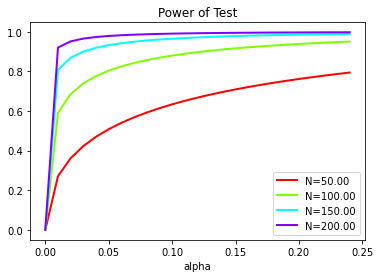

In [51]:
analysis.plot_power(dep_var='alpha', nobs=[50 ,100, 150, 200], effect_size=0.4, alpha = alphas)
plt.show()

## Computing Statistical Power for a Real Data Set

Yesterday afternoon, you conducted a t-test on the titanic data set to determine whether there was a significant difference between the average age of passengers who survived and those who did not survive. In this section, compute the statistical power of that test.

### Import the data, and drop rows where `'Age'` is NA.

In [10]:
data_url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv'

In [11]:
titanic_df = pd.read_csv(data_url)

titanic_df.info()
titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic_df.dropna(subset=['Age'], inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [13]:
titanic_df = titanic_df[titanic_df['Age'].notna()]
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


### Summarize the number of observations and average age per group.

In [14]:
survived_yes = titanic_df[titanic_df['Survived']==1]
survived_yes.info()
survived_no = titanic_df[titanic_df['Survived']==0]
survived_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  290 non-null    int64  
 1   Survived     290 non-null    int64  
 2   Pclass       290 non-null    int64  
 3   Name         290 non-null    object 
 4   Sex          290 non-null    object 
 5   Age          290 non-null    float64
 6   SibSp        290 non-null    int64  
 7   Parch        290 non-null    int64  
 8   Ticket       290 non-null    object 
 9   Fare         290 non-null    float64
 10  Cabin        125 non-null    object 
 11  Embarked     288 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 29.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  424 non-null    int64  
 1   Survived

In [15]:
survived_yes['Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
survived_no['Age'].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

There were 290 survivors with an average age of 28.34 and there were 424 non-survivors with an average age of 30.63.

### Perform t-test.

In [17]:
stats.ttest_ind(survived_yes['Age'], survived_no['Age'])

Ttest_indResult(statistic=-2.06668694625381, pvalue=0.03912465401348249)

### Calculate the Effect Size

Effect size can be calculated by using a formula known as Cohen's d, which divides the difference in means between the two groups by their pooled standard deviation.

`effect_size = (mean_of_sample1 - mean_of_sample2) / pooled_stdev`

The pooled standard deviation in the denominator can be derived as follows.

`pooled_stdev = sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))`

Where `n_obs` is the number of observations and `var` is the variance of each sample.

**Write the code below to calculate the effect size for this test.**

In [23]:
def get_effect_size(array_1, array_2):
  n_obs1 = array_1.shape[0]
  n_obs2 = array_2.shape[0]
  mean_of_sample1 = array_1.mean()
  mean_of_sample2 = array_2.mean()
  sample_1_var = array_1.var()
  sample_2_var = array_2.var()
  pooled_stdev = math.sqrt(((n_obs1 - 1) * sample_1_var + (n_obs2 - 1) * sample_2_var) / (n_obs1 + n_obs2 - 2))
  effect_size = (mean_of_sample1 - mean_of_sample2) / pooled_stdev
  return effect_size

In [25]:
effect = get_effect_size(survived_yes['Age'], survived_no['Age'])
effect

-0.15748597191363298

**Use the effect size you calculated to compute the statistical power of this test.**

In [42]:
n = survived_yes['Age'].shape[0]
ratio = survived_no['Age'].shape[0]/survived_yes['Age'].shape[0]
alpha = 0.05

power = analysis.solve_power(effect_size=effect, power=None, nobs1=n, ratio=ratio, alpha=alpha)
power

0.5414181033266559

**Determine the effect size we would need to see to get a statistical power of 0.8.**

In [43]:
effect_new = analysis.solve_power(effect_size=None, power=0.8, nobs1=n, ratio=ratio, alpha=alpha)
effect_new

0.21377414540055348

**Determine the sample size necessary to get a statistical power of 0.8.**

In [54]:
new_nobs = analysis.solve_power(effect_size=effect, power=0.8, nobs1=None, ratio=ratio, alpha=alpha)
new_nobs = math.ceil(new_nobs)
new_nobs

534

In [59]:
total_n = math.ceil(new_nobs + new_nobs*ratio)
total_n

1315

**Generate a visualization that shows the significance level we would need to get a statistical power of 0.8.**

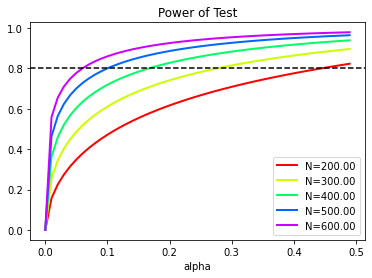

In [74]:
original_n = survived_yes['Age'].shape[0] + survived_no['Age'].shape[0]
alphas = np.array(np.arange(0, .5, 0.01))
analysis.plot_power(dep_var='alpha', nobs=[200,300,400,500,600], effect_size=effect, alpha = alphas)
plt.axhline(y=0.8, c='black', ls='dashed')
plt.show()